**การทำ CI/CD**

**1. กำหนด publicPath ใน quasar.config.js**

**Troubleshoot Quasar SPA Deployment**
- Quasar SPAs require specific configurations for GitHub Pages due to client-side routing and asset paths. A blank page often indicates issues with file paths or routing.

**Base URL Configuration:**
- Quasar uses the publicPath to determine where assets are loaded. For GitHub Pages, publicPath should account for the repository name (/VersionControl1/).
In your Quasar project, check the **quasar.config.js** file (or quasar.conf.js in older versions). Ensure the build.publicPath is set correctly:

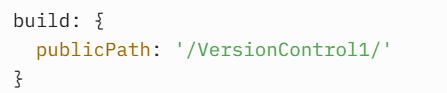

- If you’re not using a custom domain, the publicPath should match the GitHub Pages path (e.g., /VersionControl1/ for https://somnuk2.github.io/VersionControl1/).
- If publicPath is set to / (default), assets may fail to load because GitHub Pages expects /VersionControl1/ as the base path.

**2. ทำการสร้างไฟล์สำหรับการ Deploy**

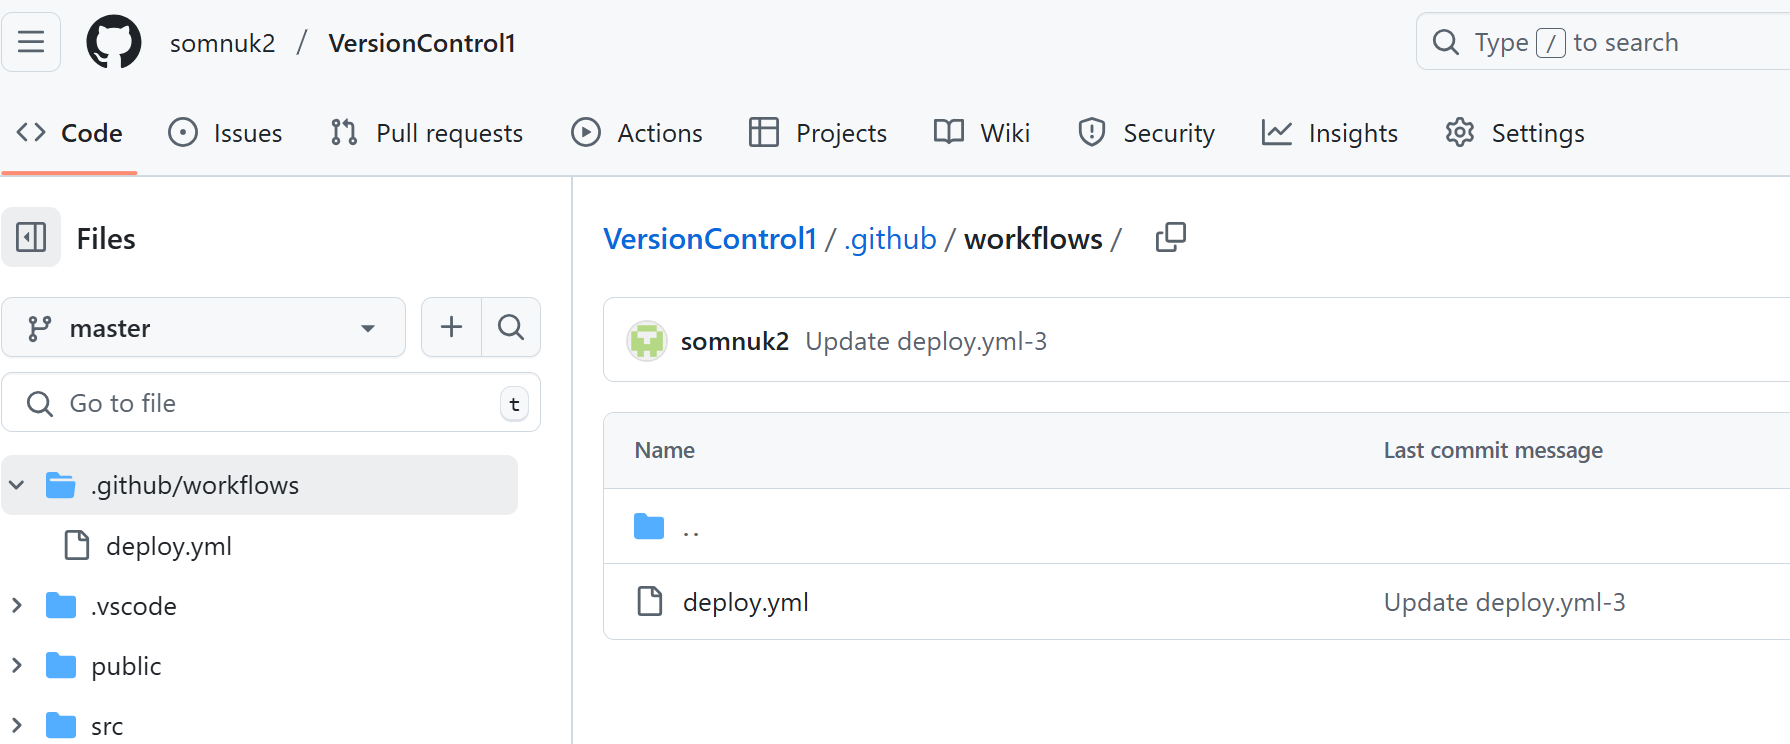

In [ ]:
# สร้าง directory
.github/workflows/deploy.yml

In [ ]:
# deploy.yml
name: CI/CD Pipeline for Quasar
on:
  push:
    branches: [ "master", "main" ]
  pull_request:
    branches: [ "master", "main" ]
jobs:
  build-deploy:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v4

      - name: Cache node_modules
        uses: actions/cache@v3
        with:
          path: ~/.npm
          key: ${{ runner.os }}-node-${{ hashFiles('**/package-lock.json') }}
          restore-keys: |
            ${{ runner.os }}-node-

      - uses: actions/setup-node@v4
        with:
          node-version: '18'

      - name: Install and Build
        run: |
          npm install
          npx quasar build

      - name: Copy index.html to 404.html
        if: github.ref == 'refs/heads/master'
        run: cp dist/spa/index.html dist/spa/404.html

      - name: Deploy to GitHub Pages
        if: github.ref == 'refs/heads/master'
        uses: peaceiris/actions-gh-pages@v3
        with:
          github_token: ${{ secrets.GITHUB_TOKEN }}
          publish_dir: ./dist/spa
          publish_branch: gh-pages

**3. เข้าสู่เมนูชื่อว่า Actions**

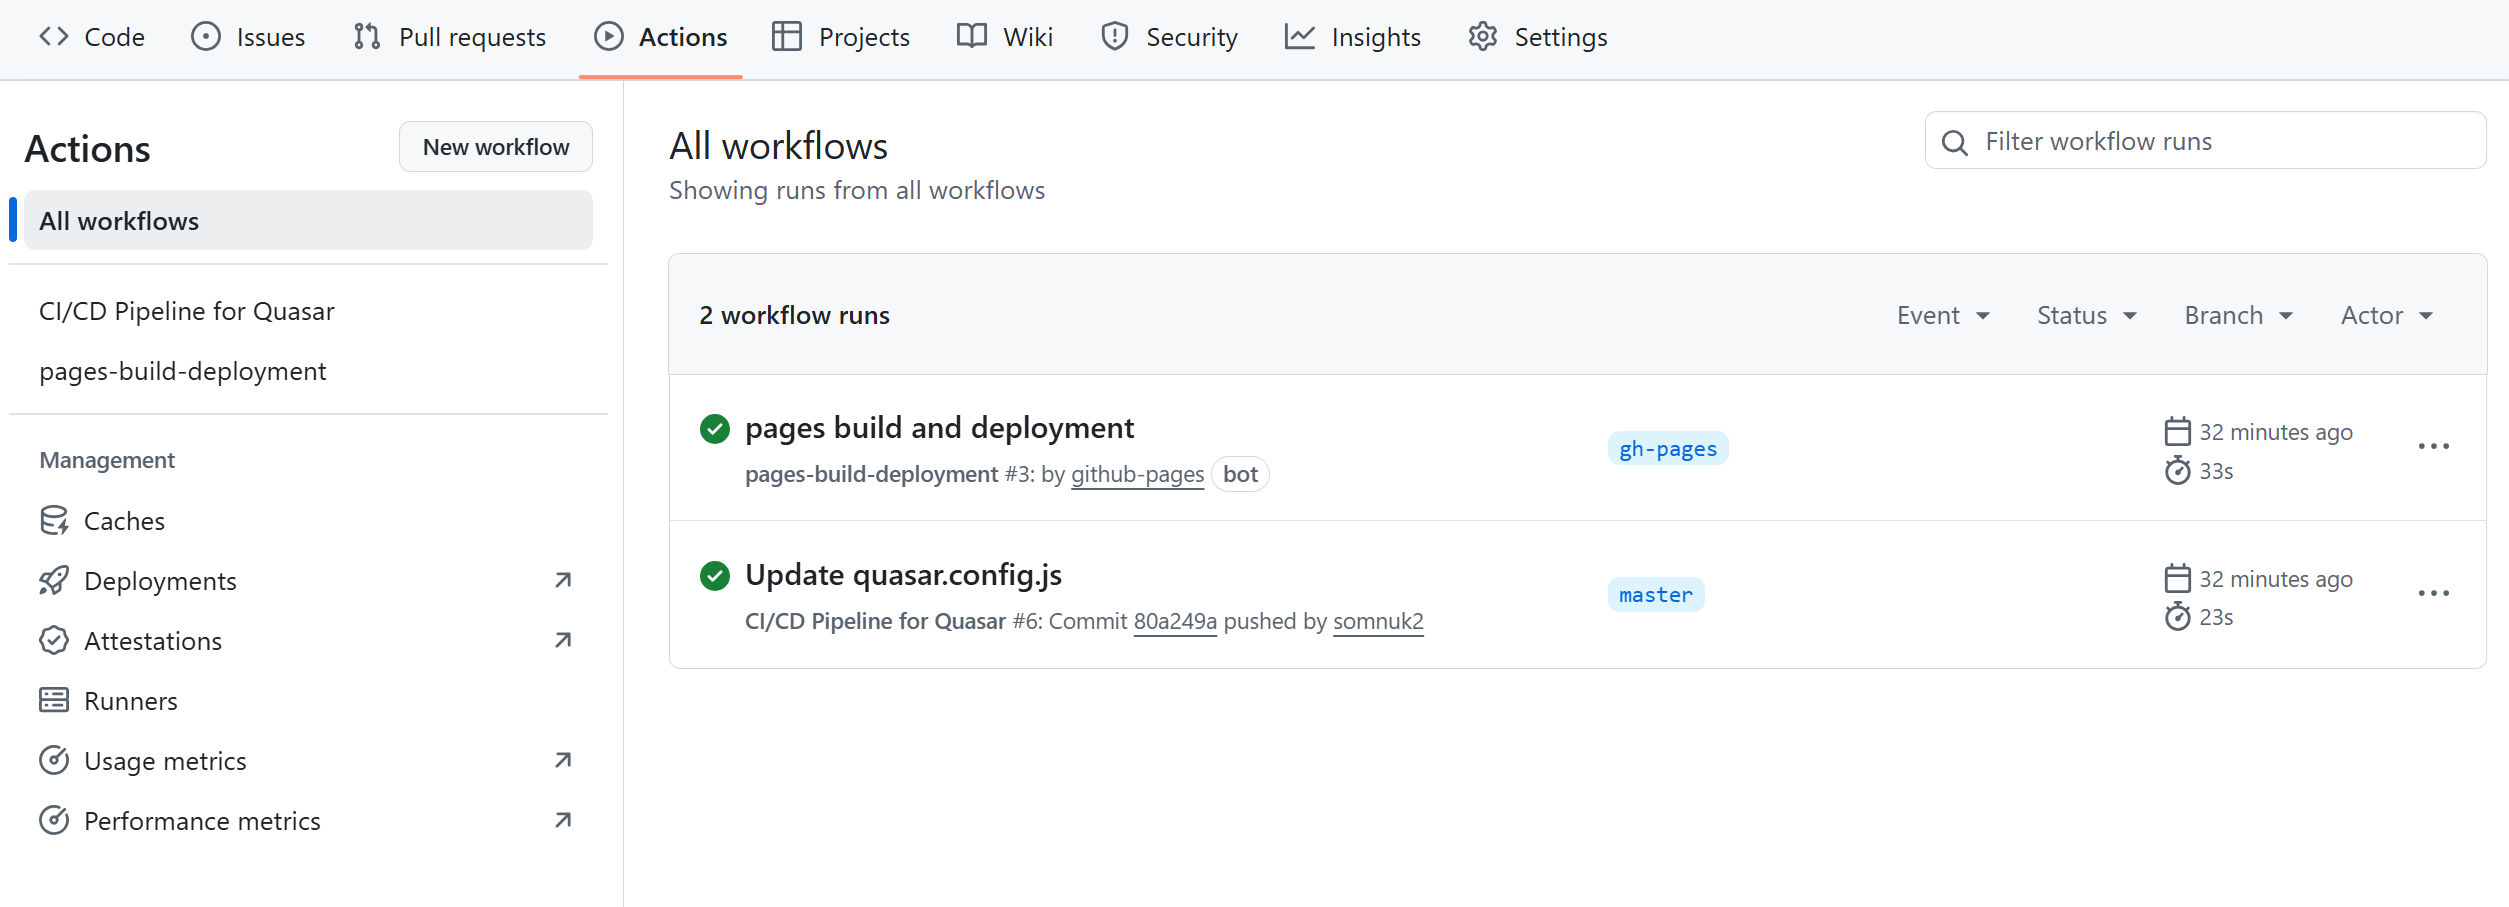

**4. กำหนดสิทธิในการเขียนและการอ่าน**

**Verify Repository Permissions:**
Ensure the GitHub Actions bot has write access to the repository. If the repository is private or has restricted permissions, the default **GITHUB_TOKEN **may not have sufficient access.
Go to your repository on GitHub, navigate to **Settings > Actions > Genera**l, and check the Workflow permissions section. Ensure **"Read and write permissions"** is selected for GitHub Actions.

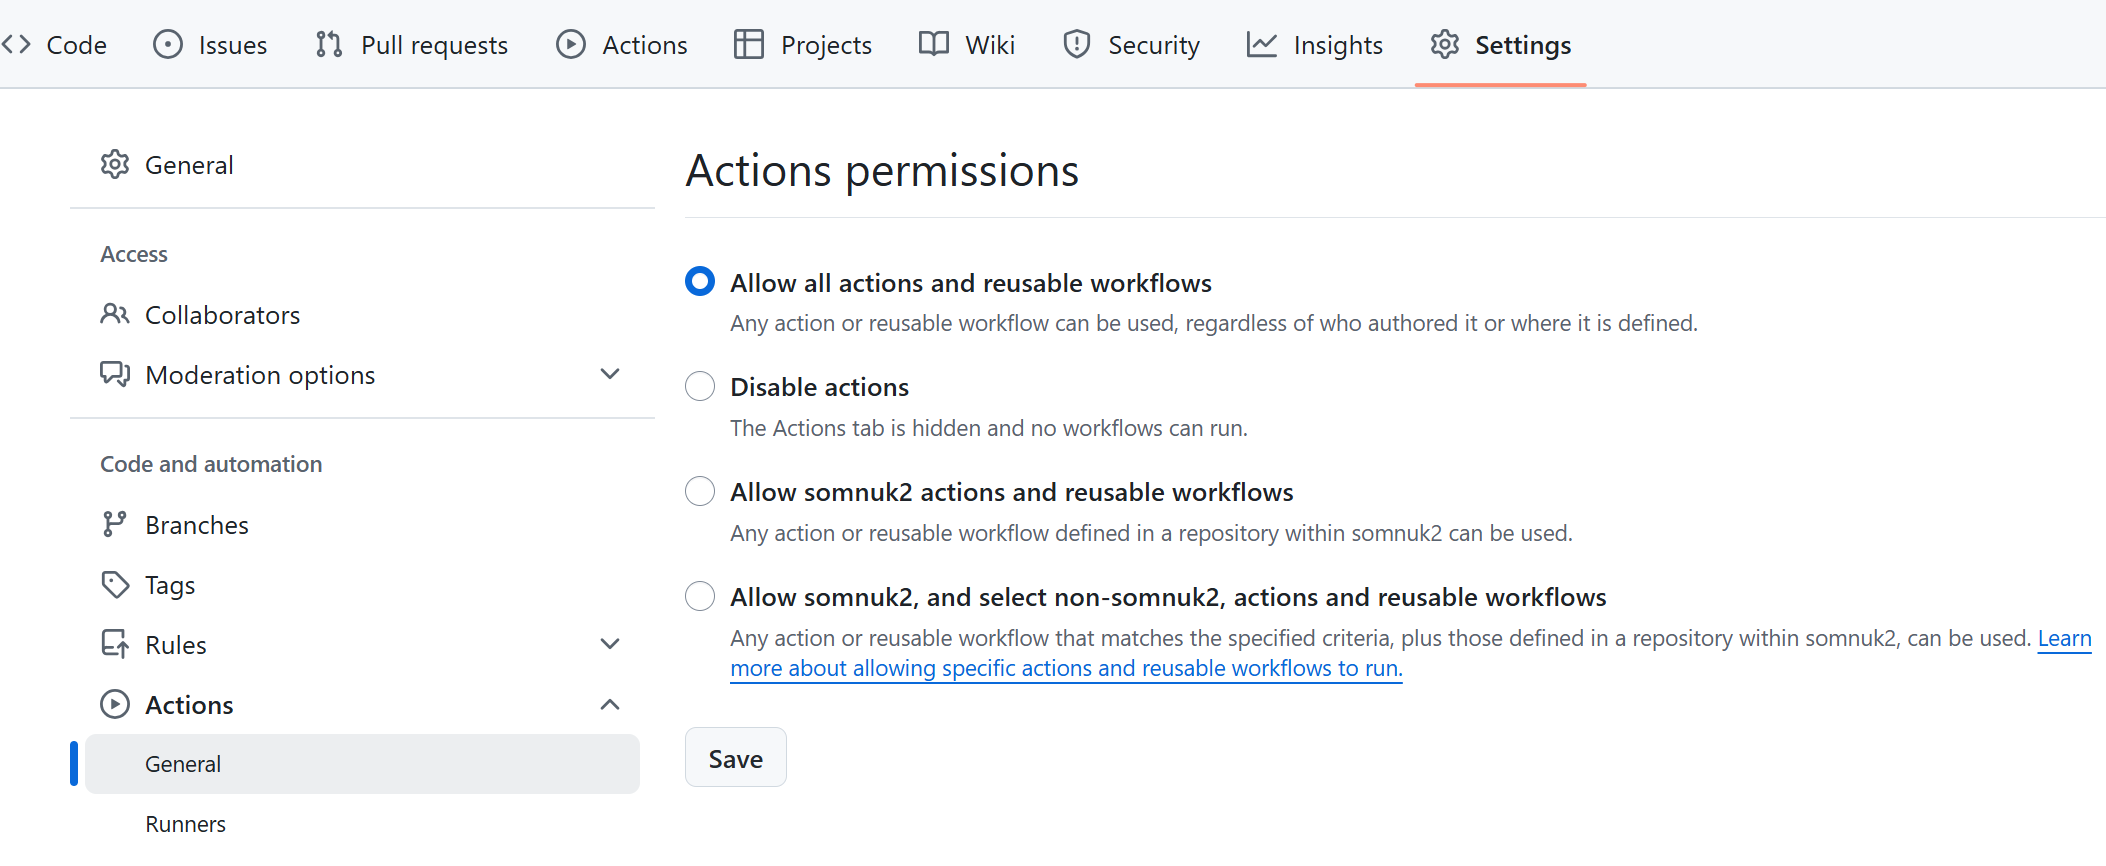

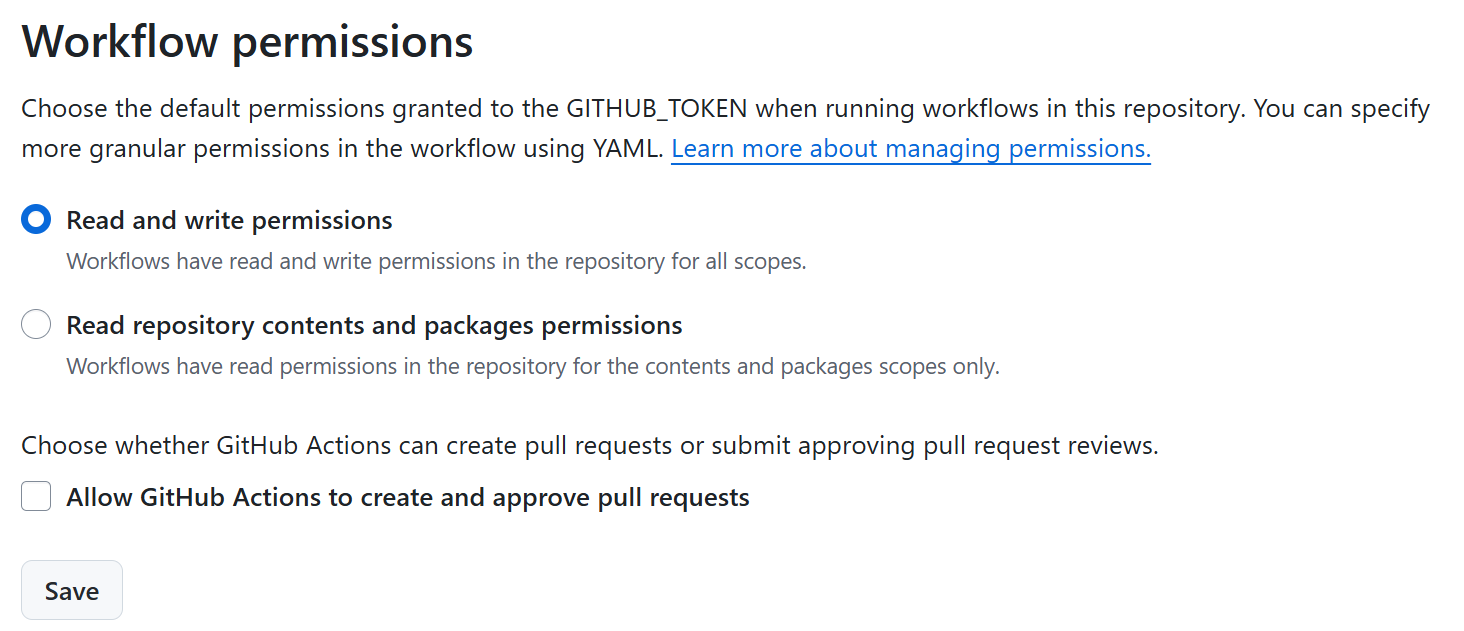

**5. กำหนดตำแหน่งในการเข้าถึงไฟล์ Pages**

**Enable GitHub Pages:**
- Go to your repository on GitHub.
- Navigate to **Settings > Pages**.
- Under Source, select the gh-pages branch and choose the root directory (/ or the folder specified in destination_dir if you set it in the workflow, e.g., ./).
- Save the settings. GitHub Pages will generate a URL for your site, typically in the format:
https://somnuk2.github.io/VersionControl1/

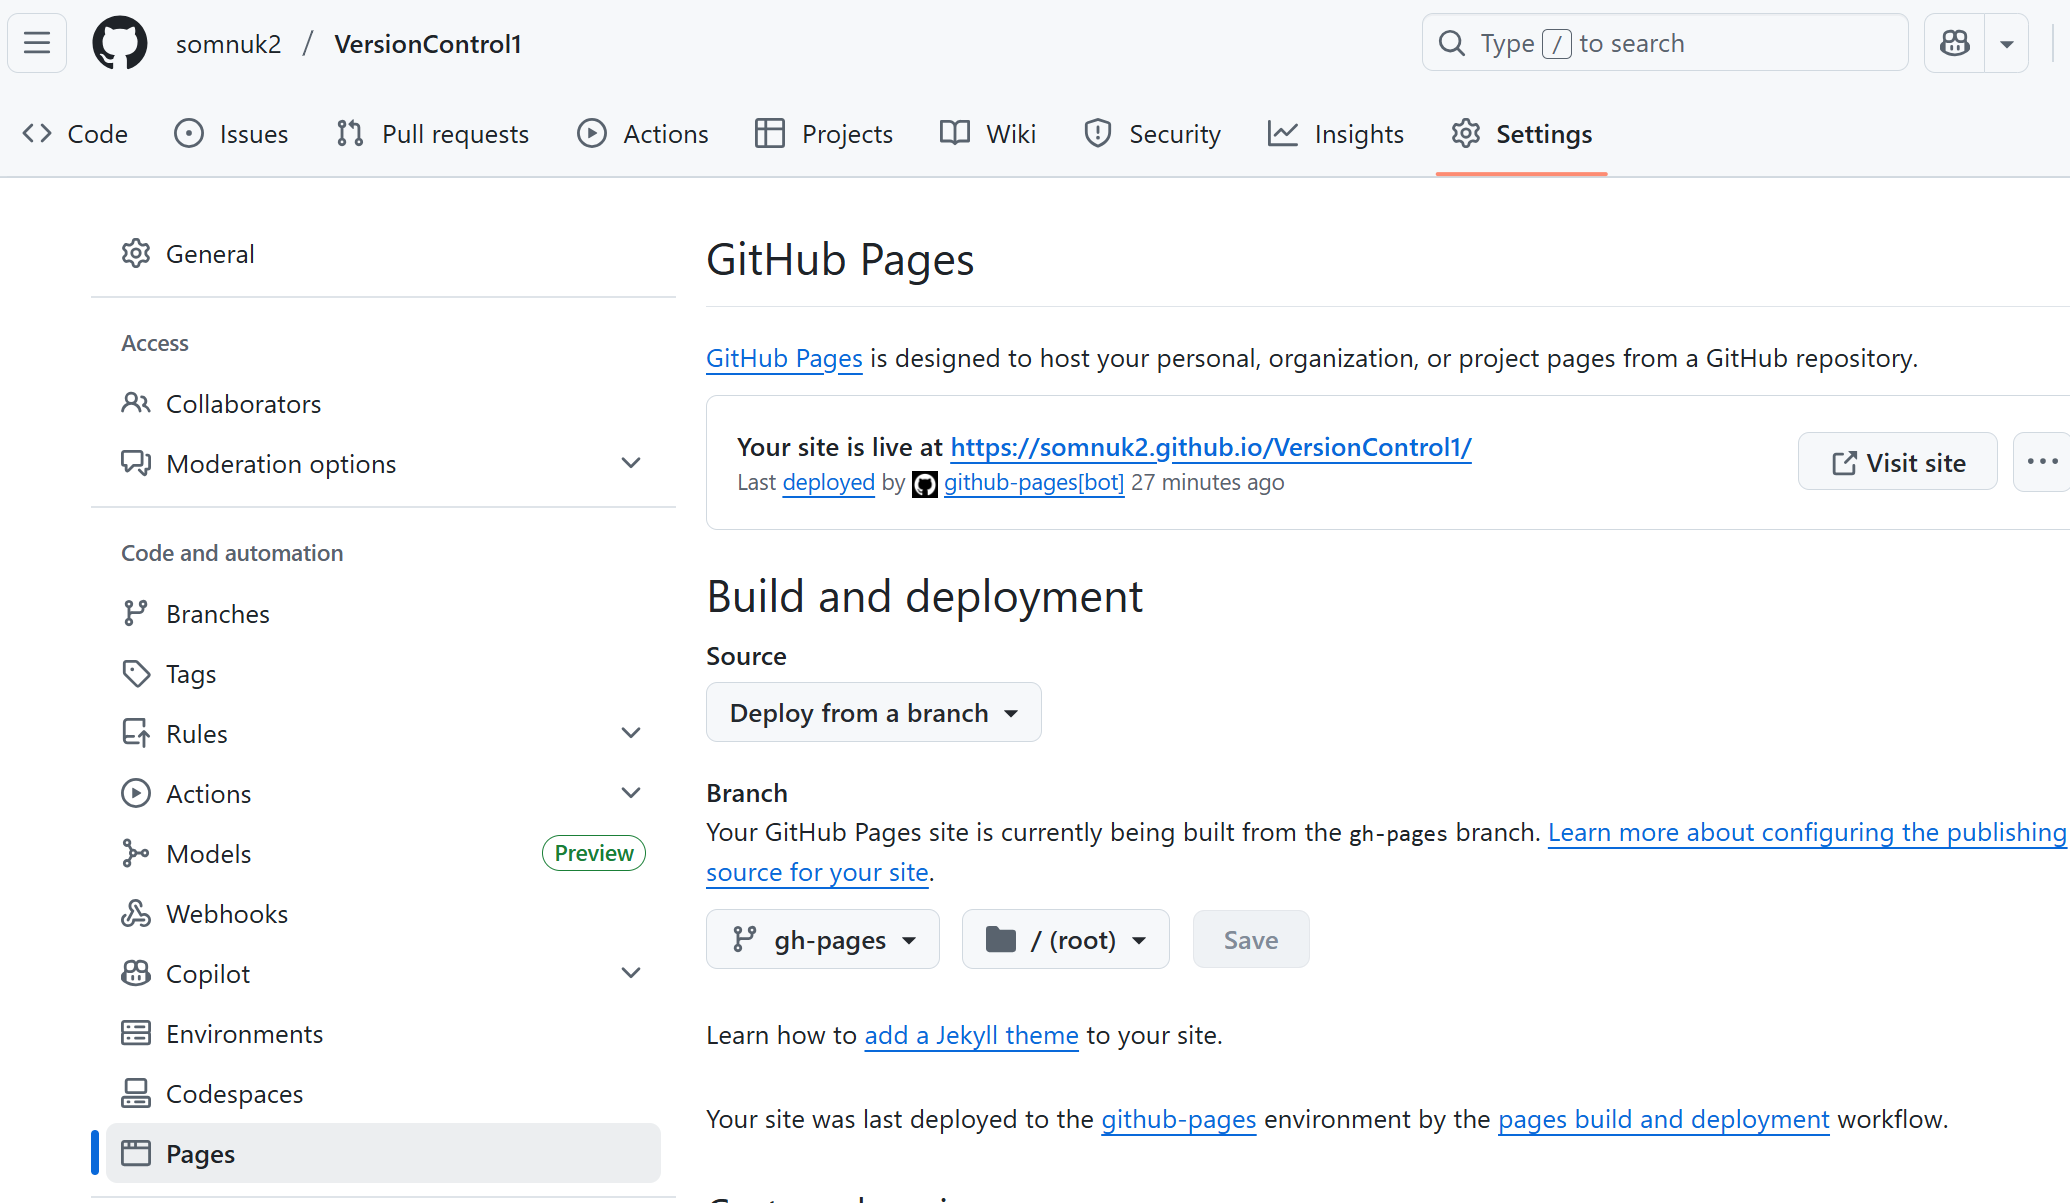